Forecasting!! -360DIGITMG

Forecasting is the process of making predictions of the future based on past and present data and analysis of trends.Trending or predicting a continuation based on the shape of the line generated by plotting past results.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Solar = pd.read_csv(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\solarpower_cumuldaybyday2.csv")
Solar = Solar.rename(columns={"date":"Month"})

In [ ]:
Solar.insert(2,'Power',0.1)
for i in range(len(Solar)):
    if i==0:
        Solar['Power'][i]= 0.1
    else:
        Solar['Power'][i]= Solar['cum_power'][i]-Solar['cum_power'][i-1]
Solar= Solar.drop('cum_power',axis=1)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15784/317207523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar['Power'][i]= 0.1
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15784/317207523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar['Power'][i]= Solar['cum_power'][i]-Solar['cum_power'][i-1]


In [ ]:
Solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   2558 non-null   object 
 1   Power   2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [ ]:
Solar.Month = pd.to_datetime(Solar.Month)
Solar1 = Solar.resample('M', on='Month').sum()
print (Solar1)
Solar.dtypes

            Power
Month            
2011-01-31   14.0
2011-02-28    6.4
2011-03-31    9.6
2011-04-30    2.5
2011-05-31    6.2
...           ...
2018-08-31  423.0
2018-09-30  382.0
2018-10-31  216.0
2018-11-30  103.0
2018-12-31  127.0

[96 rows x 1 columns]


Month    datetime64[ns]
Power           float64
dtype: object

In [ ]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

dates = pd.date_range(start='2011-01-01', freq='MS',periods=len(Solar1))
Solar1 ['Months'] = dates.month
Solar1 ['Year'] = dates.year
Solar1

,Power,Months,Year
Month,,,
2011-01-31,14.0,1,2011
2011-02-28,6.4,2,2011
2011-03-31,9.6,3,2011
2011-04-30,2.5,4,2011
2011-05-31,6.2,5,2011
...,...,...,...
2018-08-31,423.0,8,2018
2018-09-30,382.0,9,2018
2018-10-31,216.0,10,2018


In [ ]:
import calendar
Solar1 ['Months'] = Solar1 ['Months'].apply(lambda x: calendar.month_abbr[x])
Solar1 = Solar1[['Months','Year','Power']]
Solar1

,Months,Year,Power
Month,,,
2011-01-31,Jan,2011,14.0
2011-02-28,Feb,2011,6.4
2011-03-31,Mar,2011,9.6
2011-04-30,Apr,2011,2.5
2011-05-31,May,2011,6.2
...,...,...,...
2018-08-31,Aug,2018,423.0
2018-09-30,Sep,2018,382.0
2018-10-31,Oct,2018,216.0


In [ ]:
# Pre processing
Solar1["t"] = np.arange(1,97)

Solar1["t_square"] = Solar1["t"] * Solar1["t"]
Solar1["log_power"] = np.log(Solar1["Power"])
Solar1.columns
Solar1

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15784/1440068538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar1["t"] = np.arange(1,97)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15784/1440068538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar1["t_square"] = Solar1["t"] * Solar1["t"]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15784/1440068538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Months,Year,Power,t,t_square,log_power
Month,,,,,,
2011-01-31,Jan,2011,14.0,1,1,2.639057
2011-02-28,Feb,2011,6.4,2,4,1.856298
2011-03-31,Mar,2011,9.6,3,9,2.261763
2011-04-30,Apr,2011,2.5,4,16,0.916291
2011-05-31,May,2011,6.2,5,25,1.824549
...,...,...,...,...,...,...
2018-08-31,Aug,2018,423.0,92,8464,6.047372
2018-09-30,Sep,2018,382.0,93,8649,5.945421
2018-10-31,Oct,2018,216.0,94,8836,5.375278


In [ ]:

# Solar1['Months'][0]
# p=Solar1['Months'][0]
# p
# p[0:3]

# Solar1['month']=0

#for i in range(96):
#    p=Solar1['month'][i]
#    Solar1['month'][i]=p[0:3]
    
dummy= pd.DataFrame(pd.get_dummies(Solar1['Months']))

Solar1=pd.concat((Solar1,dummy),axis=1)

In [ ]:
train = Solar1.head(84)
test = Solar1.tail(12)

In [ ]:
import statsmodels.formula.api as smf

#linear model
linear= smf.ols('Power~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Power'])-np.array(predlin))**2))
rmselin

79.60452499071934

In [ ]:
#quadratic model
quad=smf.ols('Power~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Power'])-np.array(predquad))**2))
rmsequad

201.6627186436264

In [ ]:
#exponential model
expo=smf.ols('log_power~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Power'])-np.array(np.exp(predexp)))**2))
rmseexpo

516.9683349857193

In [ ]:
#additive seasonality
additive= smf.ols('Power~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predadd= pd.Series(additive.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Power'])-np.array(predadd))**2))
rmseadd

79.77403461427444

In [ ]:
#additive seasonality with linear trend
addlinear= smf.ols('Power~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul=pd.Series(addlinear.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
predadd

Month
2018-01-31    162.800000
2018-02-28    193.042857
2018-03-31    309.671429
2018-04-30    374.128571
2018-05-31    420.957143
2018-06-30    392.642857
2018-07-31    406.314286
2018-08-31    369.128571
2018-09-30    287.642857
2018-10-31    217.728571
2018-11-30    162.342857
2018-12-31    143.028571
dtype: float64

In [ ]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Power'])-np.array(predadd))**2))
rmseaddlinear

79.77403461427444

In [ ]:
#additive seasonality with quadratic trend
addquad=smf.ols('Power~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmuladd= pd.Series(addquad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmseaddquad=np.sqrt(np.mean((np.array(test['Power'])-np.array(predmuladd))**2))
rmseaddquad

138.12249039584924

In [ ]:
#multiplicative seasonality
mulsea=smf.ols('log_power~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test['Power'])-np.array(np.exp(predmul)))**2))
rmsemul

187.96331133720219

In [ ]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_power~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmulquad= pd.Series(mullin.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
rmsemulin=np.sqrt(np.mean((np.array(test['Power'])-np.array(np.exp(predmulquad)))**2))
rmsemulin

536.7822548510244

In [ ]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_power~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Power'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

286.26194459471157

In [ ]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
Rmse=pd.DataFrame(data)
Rmse


,Model,Values
0,rmse_mul_quad,286.261945
1,rmseadd,79.774035
2,rmseaddlinear,79.774035
3,rmseaddquad,138.122490
4,rmseexpo,516.968335
5,rmselin,79.604525
6,rmsemul,187.963311
7,rmsemulin,536.782255
8,rmsequad,201.662719


In [ ]:
#final model with least rmse value
Predict_Solar = Solar1.copy()
final= smf.ols('Power ~ t',data = Solar1).fit()
pred= pd.Series(final.predict(Predict_Solar))
pred


Month
2011-01-31    191.408226
2011-02-28    193.545246
2011-03-31    195.682266
2011-04-30    197.819285
2011-05-31    199.956305
                 ...    
2018-08-31    385.877028
2018-09-30    388.014048
2018-10-31    390.151068
2018-11-30    392.288088
2018-12-31    394.425107
Length: 96, dtype: float64

In [ ]:
Predict_Solar['prediction']=pred
residuals=pd.DataFrame(np.array(Solar1["Power"]-np.array(pred)))

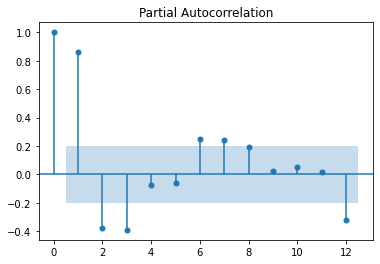

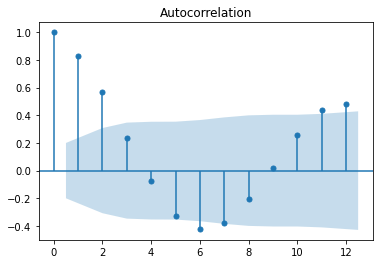

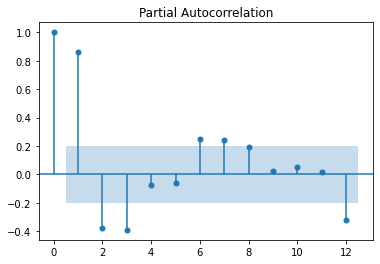

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12)
sm.graphics.tsa.plot_pacf(Solar1.Power.values.squeeze(), lags=12)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
pas=Solar["Power"]
model=ARIMA(residuals,order=(2,0,2)).fit(transparams=True)
forecasterrors=model.forecast(steps=12)[0]
Predict_Solar["forecasted_power"] = pd.Series(pred)
Predict_Solar["forecasted_errors"] = pd.Series(forecasterrors)
Predict_Solar["improved"] = Predict_Solar["forecasted_power"]+Predict_Solar["forecasted_errors"]

In [ ]:
model.forecast(steps=12)[0]

array([-262.65166877, -180.49871903,  -67.05689631,   49.13921441,
        142.02004104,  193.4976198 ,  196.61717576,  155.89959754,
         85.10165566,    3.16911273,  -70.52486161, -120.52279474])

<AxesSubplot:xlabel='Month'>

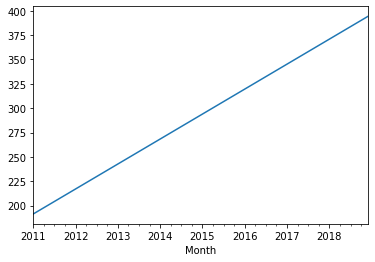

In [ ]:
Predict_Solar["forecasted_power"].plot()